In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('D:\CSE445\RTA Data 2020 to July 2023.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\2212867542.py:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\CSE445\RTA Data 2020 to July 2023.csv')


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning

In [3]:
df.shape

(46189, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  object 
 1   EcNumber                  38978 non-null  object 
 2   CallTime                  40233 non-null  object 
 3   EmergencyArea             46189 non-null  object 
 4   TotalPatientsInEmergency  46189 non-null  object 
 5   Gender                    46188 non-null  object 
 6   Age                       46188 non-null  float64
 7   HospitalName              24239 non-null  object 
 8   Reason                    46188 non-null  object 
 9   responsetime              46184 non-null  float64
 10  EducationTitle            46188 non-null  object 
 11  InjuryType                46187 non-null  object 
 12  Cause                     46187 non-null  object 
 13  PatientStatus             46187 non-null  object 
 14  Bicycl

In [5]:
df.isnull().sum()

EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          1
Age                             1
HospitalName                21950
Reason                          1
responsetime                    5
EducationTitle                  1
InjuryType                      2
Cause                           2
PatientStatus                   2
BicycleInvovled                 2
BikesInvolved                   2
BusesInvolved                   2
CarsInvolved                    2
CartInvovled                    2
RickshawsInvolved               2
TractorInvovled                 2
TrainsInvovled                  2
TrucksInvolved                  2
VansInvolved                    2
OthersInvolved                  2
dtype: int64


*Visualize the percentage of missing values for each column*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\4188986222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')


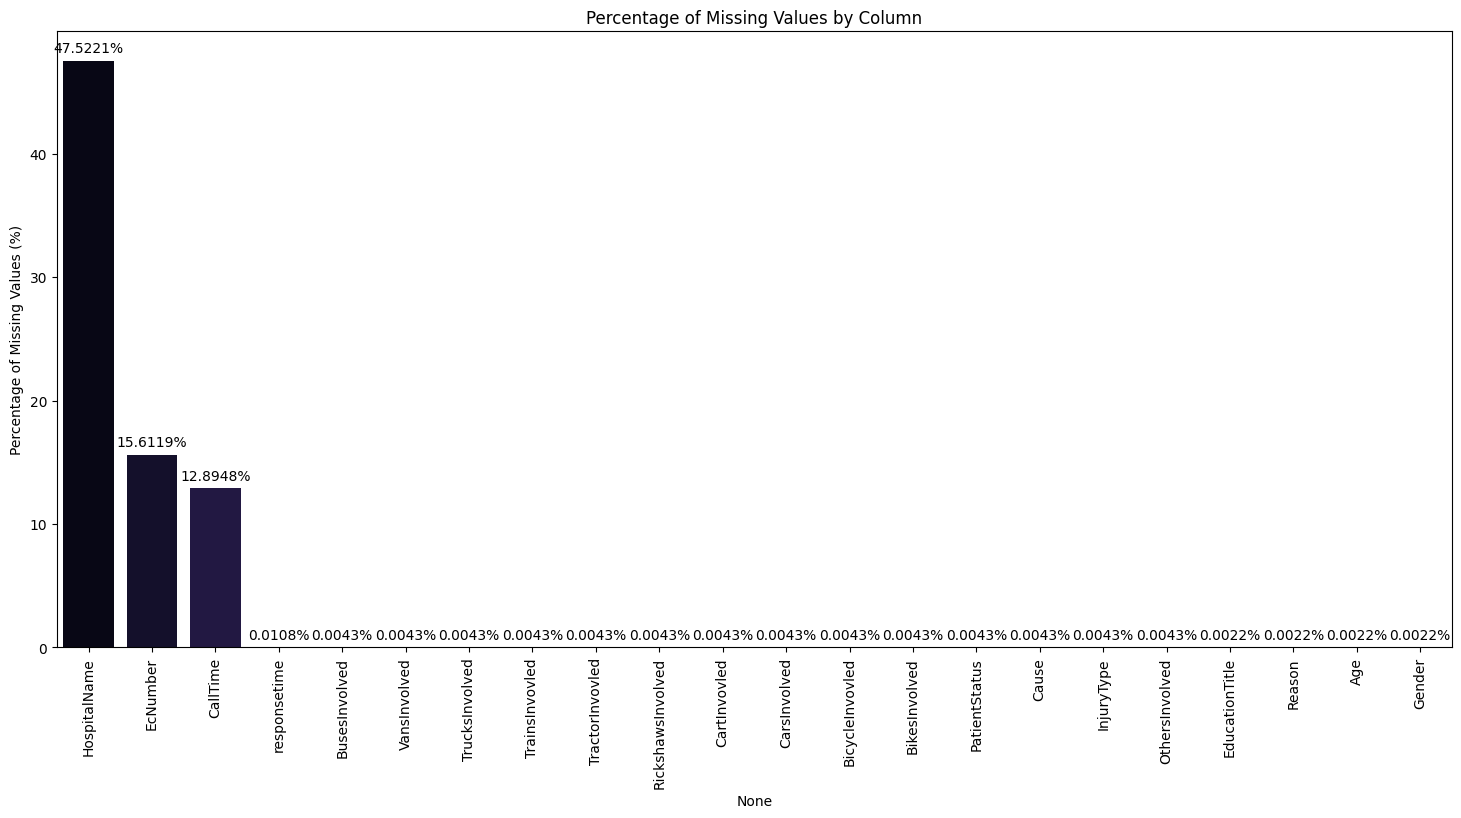

In [6]:
df_null_percentage = (df.isnull().sum() / len(df)) * 100
df_null_percentage = df_null_percentage[df_null_percentage > 0].sort_values(ascending=False)


plt.figure(figsize=(18, 8))
ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values (%)')

# Adding data labels with more decimal precision
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{height:.4f}%',  # Use 4 decimal places
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), textcoords='offset points')

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\3666166832.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\3666166832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\3666166832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

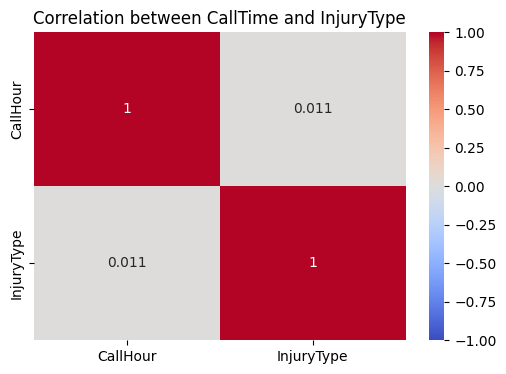

In [7]:
df_CallTime = df[['CallTime', 'InjuryType']]

# Preprocessing CallTime (convert to datetime and extract hour for correlation)
df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
df_CallTime['CallHour'] = df_CallTime['CallTime'].dt.hour  # Extract hour

# Encoding InjuryType as a numerical value
df_CallTime['InjuryType'] = df_CallTime['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_CallTime.dropna(inplace=True)

# Calculate correlation between CallHour and InjuryType
correlation = df_CallTime[['CallHour', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\729411802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\729411802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\729411802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

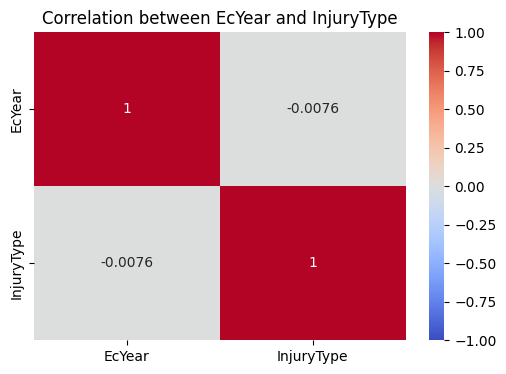

In [8]:
df_EcYear = df[['EcYear', 'InjuryType']]

# Encoding EcYear as a numerical value (2022 -> 0, 2023 -> 1, 2024 -> 2)
df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes

# Encoding InjuryType as a numerical value
df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_EcYear.dropna(inplace=True)

# Calculate correlation between EcYear and InjuryType
correlation = df_EcYear[['EcYear', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.show()

**CALLTIME HANDLE**

By analysing the dataset the missing values of CallTime portion are not missing. For consequtive two or three rows they are pointed as one single row due to having the same value. Therefore, we handled them by doing forward filling.

**EcNumber HANDLE**

By analysing the dataset the missing values of EcNumber portion are not missing. For consequtive two or three rows they are pointed as one single row due to having the same value. Therefore, we handled them by doing forward filling.

**HospitalName HANDLE**


Drop the HospitalName coloumn as it is less important and have huge NULL values

In [9]:
#drop columns

df.drop(['HospitalName','EcNumber','CallTime','EcYear'], axis=1, inplace=True)

In [10]:
# df = df.dropna(thresh=len(df.columns) - 2)
df = df.dropna()


mean_responsetime = int(df['responsetime'].mean())  # Calculate integer mean
df['responsetime'].fillna(mean_responsetime, inplace=True)  # Fill NaN with mean

# Output the cleaned DataFrame to check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46183 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46183 non-null  object 
 1   TotalPatientsInEmergency  46183 non-null  object 
 2   Gender                    46183 non-null  object 
 3   Age                       46183 non-null  float64
 4   Reason                    46183 non-null  object 
 5   responsetime              46183 non-null  float64
 6   EducationTitle            46183 non-null  object 
 7   InjuryType                46183 non-null  object 
 8   Cause                     46183 non-null  object 
 9   PatientStatus             46183 non-null  object 
 10  BicycleInvovled           46183 non-null  float64
 11  BikesInvolved             46183 non-null  float64
 12  BusesInvolved             46183 non-null  float64
 13  CarsInvolved              46183 non-null  float64
 14  CartInvovle

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\3949978436.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['responsetime'].fillna(mean_responsetime, inplace=True)  # Fill NaN with mean


In [11]:
df.isnull().sum()

EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  0
Cause                       0
PatientStatus               0
BicycleInvovled             0
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvovled                0
RickshawsInvolved           0
TractorInvovled             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
dtype: int64

In [12]:
df.shape

(46183, 21)

*Dropping duplicate coloumns*

In [13]:
df[df.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,Near sehal village chakri road Rwp,4,Male,42.0,same,8.0,Matric,Minor,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,Infront of ashraf marriage hall dhoke hafiz ...,3,Male,16.0,same,3.0,Matric,Minor,Over Speed,Alive & unstable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6037,Near flying Club Old airport road rwp,3,Male,18.0,Same,7.0,Primary,Minor,Over Speed,Alive & unstable,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,5,Male,17.0,same,7.0,Matric,Minor,Over Speed,Alive & unstable,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,4,Male,50.0,same,6.0,Primary,Minor,U Turn,Alive & unstable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",5,Female,45.0,Same,7.0,Middle,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,ranial near ranial choki chakri road rwp,4,Male,27.0,Same,8.0,Illetrate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",3,Male,18.0,Same,12.0,Primary,Minor,Carelessness,Alive & stable,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21791,Missa Kaswal GT Road Gujjar Khan Rwp,8,Male,30.0,same,10.0,Illetrate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
23862,AZAD PATTAN AZAD KASHMIR KAHUTA,5,Male,40.0,same,53.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df = df.drop_duplicates()
df.shape

(46155, 21)

In [15]:
df.head()

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.describe()

,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000,46155.000000
mean,32.449355,6.252779,0.008731,0.967609,0.009186,0.233842,0.001972,0.087314,0.009815,0.002210,0.044892,0.117235,0.009663
std,15.176838,4.887782,0.093499,0.578586,0.100277,0.447900,0.044360,0.289348,0.098583,0.046959,0.220842,0.334515,0.098927
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000


## Encodings

In [17]:
#patient status one hot encoding
from sklearn.preprocessing import OneHotEncoder
# Copy the original df to avoid modifying it
# df_encoded = df.copy()

# One-hot encode the PatientStatus column
encoder = OneHotEncoder(sparse_output=False)  # Ensure a dense array is returned
arr = encoder.fit_transform(df[['PatientStatus']])

# Create a DataFrame with the one-hot encoded values
en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

# Reset the index of en_df to match df_encoded if necessary
en_df.index = df.index

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, en_df], axis=1)
df.drop(['PatientStatus'], axis=1, inplace=True)
# Display the new DataFrame with the encoded columns
df

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead
0,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
46185,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46186,Main Bakra Mandi Chowk Rwp,1,Female,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46187,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\4241987383.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_percentage.index, y=status_percentage.values, palette=colors)


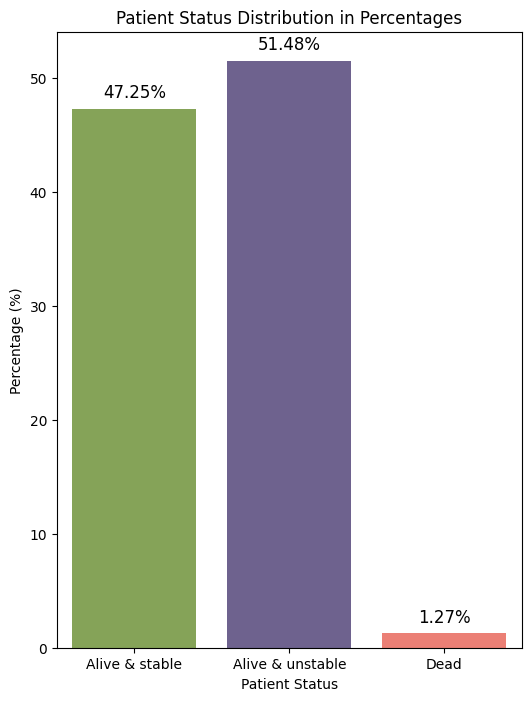

In [18]:
total_entries = len(df)

# Calculate the percentage for each category
status_percentage = (df[[ "Alive & stable", "Alive & unstable","Dead"]].sum() / total_entries) * 100

# Define custom colors for the bars
colors = ['#88B04B', '#6B5B95', '#FF6F61']  # You can customize these colors

# Plot a bar plot using seaborn
plt.figure(figsize=(6,8))
sns.barplot(x=status_percentage.index, y=status_percentage.values, palette=colors)

# Add percentage values on top of the bars
for i, val in enumerate(status_percentage.values):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', fontsize=12)

# Set plot labels and title
plt.xlabel('Patient Status')
plt.ylabel('Percentage (%)')
plt.title('Patient Status Distribution in Percentages')

# Show the plot
plt.show()

In [19]:
df.isnull().sum()

EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  0
Cause                       0
BicycleInvovled             0
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvovled                0
RickshawsInvolved           0
TractorInvovled             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
Alive & stable              0
Alive & unstable            0
Dead                        0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46155 entries, 0 to 46188
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46155 non-null  float64
 1   TotalPatientsInEmergency  46155 non-null  object 
 2   Age                       46155 non-null  float64
 3   Reason                    46155 non-null  int32  
 4   responsetime              46155 non-null  float64
 5   BicycleInvovled           46155 non-null  float64
 6   BikesInvolved             46155 non-null  float64
 7   BusesInvolved             46155 non-null  float64
 8   CarsInvolved              46155 non-null  float64
 9   CartInvovled              46155 non-null  float64
 10  RickshawsInvolved         46155 non-null  float64
 11  TractorInvovled           46155 non-null  float64
 12  TrainsInvovled            46155 non-null  float64
 13  TrucksInvolved            46155 non-null  float64
 14  VansInvolve

In [21]:
# One-hot encode the PatientStatus column with sparse_output=False
encoder = OneHotEncoder(sparse_output=False)  # Updated the argument to 'sparse_output'
arr = encoder.fit_transform(df[['Gender']])

# Create a DataFrame with the one-hot encoded values
en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

# Reset the index of en_df to match df_encoded if necessary
en_df.index = df.index

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, en_df], axis=1)
df.drop(['Gender'], axis=1, inplace=True)
# Display the new DataFrame with the encoded columns
df

,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other
0,NEAR APS SCHOOL FORT ROAD RWP,1,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Infront of Daig.com, Near Dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,Infront Of Mian G hotel GT Road Mandra,2,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46185,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46186,Main Bakra Mandi Chowk Rwp,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46187,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25316\3901255875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)


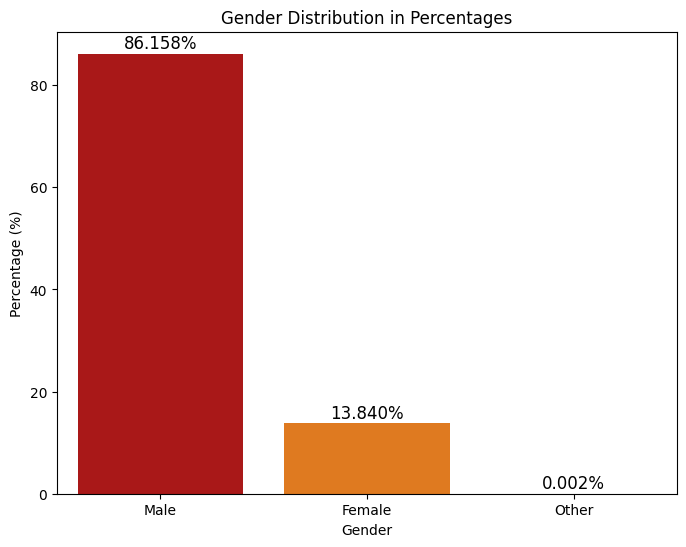

In [22]:
total_entries_gender = len(df)

# Calculate the percentage for each gender category
gender_percentage = (df[["Male", "Female", "Other"]].sum() / total_entries_gender) * 100

# Define custom colors for the bars
gender_colors = ['#c10000', '#ff7800','#1330bf']  # You can customize these colors (e.g., pink and light blue)

# Plot a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)

# Add percentage values on top of the bars
for i, val in enumerate(gender_percentage.values):
    plt.text(i, val + 1, f'{val:.3f}%', ha='center', fontsize=12)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender Distribution in Percentages')

# Show the plot
plt.show()

# END OF UPDATE BY SAMIUL

In [23]:
#apply frequency encoding on EmergencyArea column
freq = df.groupby('EmergencyArea').size()/len(df)
df['EmergencyArea'] = df['EmergencyArea'].map(freq)
df


,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other
0,0.000022,1,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000022,1,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000022,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000022,1,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000022,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,0.000043,2,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46185,0.000043,1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46186,0.000022,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46187,0.000022,1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df['EmergencyArea'].value_counts()

EmergencyArea
0.000022    32367
0.000043     7686
0.000065     2220
0.000087      828
0.000108      595
0.000130      390
0.000152      273
0.000238      209
0.000195      207
0.000173      184
0.000347      128
0.000433      120
0.000217      120
0.000390      108
0.000282       78
0.000260       72
0.000303       70
0.000368       68
0.000325       60
0.000477       44
0.000455       42
0.000910       42
0.000412       38
0.000823       38
0.000715       33
0.000672       31
0.000628       29
0.000607       28
0.000520       24
0.000498       23
Name: count, dtype: int64

In [25]:
#reason column print
df['Reason'].value_counts().unique()

array([2318, 1314, 1223, 1012,  957,  956,  642,  476,  381,  375,  364,
        334,  299,  261,  223,  207,  189,  172,  166,  151,  149,  147,
        145,  141,  140,  138,  122,  121,  109,  103,  102,  100,   98,
         92,   89,   78,   73,   72,   69,   67,   66,   64,   62,   56,
         55,   51,   50,   49,   48,   47,   46,   45,   44,   43,   41,
         39,   38,   37,   36,   35,   34,   33,   32,   31,   30,   29,
         28,   26,   25,   24,   23,   22,   21,   20,   19,   18,   17,
         16,   15,   14,   13,   12,   11,   10,    9,    8,    7,    6,
          5,    4,    3,    2,    1], dtype=int64)

Reason 'same' value ffilled

In [26]:
# Step 1: Clean the "Reason" column by stripping spaces and converting to lowercase for uniformity
df['Reason'] = df['Reason'].str.strip().str.lower()

# Step 2: Replace 'same' with NaN so that we can forward fill it
df['Reason'] = df['Reason'].replace('same', None)

# Step 3: Forward fill the NaN values with the previous valid value
df['Reason'] = df['Reason'].ffill()

# Check the result
print(df['Reason'].head(30))


0                                             bike slip
1                                      car hit footpath
2                                 rickshaw hit with car
3                               car hit car and runaway
4                     unknown bike hit bike and runaway
5                             bike hit bike and runaway
6                                             bike slip
7     fall from bike, where patient tak lift from bi...
8                          bike slip due to oil on road
9                   rickshaw hit pedestrian and runaway
10                             car hit bike and runaway
11                                     vehicle hit bike
12                    car hit footpah due to tyre burst
13                                        bike hit bike
14                       bike hit pedetrian and runaway
15                                          bike sliped
16                                  bike hit pedestrian
17                                        bike h

In [27]:
df.head()


,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other
0,0.000022,1,27.0,bike slip,10.0,Intermediate,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000022,1,20.0,car hit footpath,12.0,Illetrate,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000022,1,48.0,rickshaw hit with car,10.0,Illetrate,Single Fracture,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000022,1,45.0,car hit car and runaway,5.0,Matric,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000022,1,22.0,unknown bike hit bike and runaway,5.0,Matric,Single Fracture,Over Speed,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to columns
df['Reason'] = le.fit_transform(df['Reason'])
df

,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other
0,0.000022,1,27.0,8022,10.0,Intermediate,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000022,1,20.0,11112,12.0,Illetrate,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000022,1,48.0,16574,10.0,Illetrate,Single Fracture,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000022,1,45.0,11075,5.0,Matric,Minor,Over Speed,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000022,1,22.0,19055,5.0,Matric,Single Fracture,Over Speed,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,0.000043,2,20.0,103,3.0,Illetrate,Single Fracture,Carelessness,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46185,0.000043,1,16.0,9205,11.0,Illetrate,Minor,Carelessness,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
46186,0.000022,1,10.0,17263,1.0,Primary,Minor,Carelessness,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46187,0.000022,1,19.0,9013,12.0,Primary,Minor,Over Speed,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#injuri type data value print
#df['InjuryType'].value_counts()
df['InjuryType'].unique()


array(['Minor', 'Single Fracture', 'Head Injury', 'Multiple Fractures',
       'Spinal Injury'], dtype=object)

Considering InjuryType as order of Dangerness

In [30]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order of injury types
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

# Creating the OrdinalEncoder object with the defined order
ordinal_encoder = OrdinalEncoder(categories=injury_order)

# Applying ordinal encoding to the InjuryType column
df['InjuryType_Ordinal'] = ordinal_encoder.fit_transform(df[['InjuryType']])

# Dropping the original 'InjuryType' column
df.drop(['InjuryType'], axis=1, inplace=True)

# Display the updated DataFrame
df


,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,...,TrucksInvolved,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other,InjuryType_Ordinal
0,0.000022,1,27.0,8022,10.0,Intermediate,Over Speed,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000022,1,20.0,11112,12.0,Illetrate,Over Speed,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000022,1,48.0,16574,10.0,Illetrate,Over Speed,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.000022,1,45.0,11075,5.0,Matric,Over Speed,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000022,1,22.0,19055,5.0,Matric,Over Speed,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,0.000043,2,20.0,103,3.0,Illetrate,Carelessness,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
46185,0.000043,1,16.0,9205,11.0,Illetrate,Carelessness,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46186,0.000022,1,10.0,17263,1.0,Primary,Carelessness,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
46187,0.000022,1,19.0,9013,12.0,Primary,Over Speed,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df['EducationTitle'].unique()

array(['Intermediate', 'Illetrate', 'Matric', 'Primary', 'Graduation',
       'Masters', 'Middle', 'PHD'], dtype=object)

In [33]:
injury_order = [['Illetrate','Primary', 'Matric','Middle','Intermediate','Graduation','Masters','PHD']]

# Creating the OrdinalEncoder object with the defined order
ordinal_encoder = OrdinalEncoder(categories=injury_order)

# Applying ordinal encoding to the InjuryType column
df['EducationTitle_Ordinal'] = ordinal_encoder.fit_transform(df[['EducationTitle']])

# Dropping the original 'InjuryType' column
df.drop(['EducationTitle'], axis=1, inplace=True)

# Display the updated DataFrame
df

,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,...,VansInvolved,OthersInvolved,Alive & stable,Alive & unstable,Dead,Female,Male,Other,InjuryType_Ordinal,EducationTitle_Ordinal
0,0.000022,1,27.0,8022,10.0,Over Speed,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
1,0.000022,1,20.0,11112,12.0,Over Speed,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000022,1,48.0,16574,10.0,Over Speed,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000022,1,45.0,11075,5.0,Over Speed,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,0.000022,1,22.0,19055,5.0,Over Speed,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,0.000043,2,20.0,103,3.0,Carelessness,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
46185,0.000043,1,16.0,9205,11.0,Carelessness,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
46186,0.000022,1,10.0,17263,1.0,Carelessness,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
46187,0.000022,1,19.0,9013,12.0,Over Speed,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
encoder = OneHotEncoder(sparse_output=False)  # Updated the argument to 'sparse_output'
arr = encoder.fit_transform(df[['Cause']])

# Create a DataFrame with the one-hot encoded values
en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

en_df.index = df.index

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, en_df], axis=1)
df.drop(['Cause'], axis=1, inplace=True)
# Display the new DataFrame with the encoded columns
df

,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,...,Other,InjuryType_Ordinal,EducationTitle_Ordinal,Carelessness,One Wheeling,Others,Over Speed,Tyre Burst,U Turn,Wrong Turn
0,0.000022,1,27.0,8022,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000022,1,20.0,11112,12.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000022,1,48.0,16574,10.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000022,1,45.0,11075,5.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000022,1,22.0,19055,5.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,0.000043,2,20.0,103,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46185,0.000043,1,16.0,9205,11.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46186,0.000022,1,10.0,17263,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,0.000022,1,19.0,9013,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46155 entries, 0 to 46188
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46155 non-null  float64
 1   TotalPatientsInEmergency  46155 non-null  float64
 2   Age                       46155 non-null  float64
 3   Reason                    46155 non-null  int32  
 4   responsetime              46155 non-null  float64
 5   BicycleInvovled           46155 non-null  float64
 6   BikesInvolved             46155 non-null  float64
 7   BusesInvolved             46155 non-null  float64
 8   CarsInvolved              46155 non-null  float64
 9   CartInvovled              46155 non-null  float64
 10  RickshawsInvolved         46155 non-null  float64
 11  TractorInvovled           46155 non-null  float64
 12  TrainsInvovled            46155 non-null  float64
 13  TrucksInvolved            46155 non-null  float64
 14  VansInvolve